# Global Power Plant Database


# Problem Statement:


# Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

# Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

Downlaod Files:
    
    
https://github.com/wri/global-power-plant-database/blob/master/source_databases_csv/database_IND.csv

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from  sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from scipy.stats import zscore
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_roc_curve,roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor


import warnings
warnings.filterwarnings('ignore')

In [2]:
#read the dataset 

df=pd.read_csv('Global_Power_Plant_Database.csv')

In [3]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [4]:
df.nunique()

country                       1
country_long                  1
name                        908
gppd_idnr                   908
capacity_mw                 365
latitude                    837
longitude                   828
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013         364
generation_gwh_2014         374
generation_gwh_2015         398
generation_gwh_2016         405
generation_gwh_2017         410
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

In [5]:
df.shape

(908, 25)

There are 908 rows and 25 columns in the dataset that means we have total no of 908 entries and 25 features in this dataset.


In [6]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

Found out all the column names of the dataset.There are 25 columns in this dataset.


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
country                     908 non-null object
country_long                908 non-null object
name                        908 non-null object
gppd_idnr                   908 non-null object
capacity_mw                 908 non-null float64
latitude                    862 non-null float64
longitude                   862 non-null float64
primary_fuel                908 non-null object
other_fuel1                 199 non-null object
other_fuel2                 1 non-null object
other_fuel3                 0 non-null float64
commissioning_year          528 non-null float64
owner                       342 non-null object
source                      908 non-null object
url                         908 non-null object
geolocation_source          889 non-null object
wepp_id                     0 non-null float64
year_of_capacity_data       520 non-null float64
generation_gwh_2013         38

The dataset is mixture of nominal, continuous and categorical values.


In [10]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

The dataset is mixture of nominal, continuous and categorical values.


In [11]:
# Statistical summary:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
capacity_mw,908.0,321.046378,580.221767,0.0000,16.837500,60.000000,388.125000,4760.000
latitude,862.0,21.196189,6.248627,8.1689,16.771575,21.778300,25.516375,34.649
longitude,862.0,77.447848,4.907260,68.6447,74.258975,76.719250,79.441475,95.408
other_fuel3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
commissioning_year,528.0,1996.876894,17.047817,1927.0000,1988.000000,2000.000000,2011.250000,2018.000
wepp_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_of_capacity_data,520.0,2018.000000,0.000000,2018.0000,2018.000000,2018.000000,2018.000000,2018.000
generation_gwh_2013,384.0,2304.059202,3794.767492,0.0000,244.458088,797.063475,2795.021500,27586.200
generation_gwh_2014,401.0,2420.393316,4013.558173,0.0000,223.650436,805.760000,3034.575000,28127.000
generation_gwh_2015,425.0,2414.072373,4183.203199,0.0000,174.174750,701.027250,3080.000000,30539.000


In [12]:
#Checking null values:
df.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

we can see that there is null values in almost all the columns except country,country_long,name,gppd_inr,capacity_mw,source and url.


In [13]:
# filling the missing values of the numerical columns:

df['latitude'] = df['latitude'].fillna(df['latitude'].mean())
df['longitude'] = df['longitude'].fillna(df['longitude'].mean())
df['commissioning_year'] = df['commissioning_year'].fillna(df['commissioning_year'].mean())
df['wepp_id'] = df['wepp_id'].fillna(df['wepp_id'].mean())
df['year_of_capacity_data'] = df['year_of_capacity_data'].fillna(df['year_of_capacity_data'].mean())
df['generation_gwh_2013'] = df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].mean())
df['generation_gwh_2014'] = df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean())
df['generation_gwh_2015'] = df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean())
df['generation_gwh_2016'] = df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean())
df['generation_gwh_2017'] = df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean())
df['estimated_generation_gwh'] = df['estimated_generation_gwh'].fillna(df['estimated_generation_gwh'].mean())
df['other_fuel3'] = df['other_fuel3'].fillna(df['other_fuel3'].mean())

filled the missing values of the numerical columns by using mean method.


In [14]:
#filling the missing values of the categorical columns:
df['generation_data_source'] = df['generation_data_source'].fillna(df['generation_data_source'].mode()[0])
df['geolocation_source'] = df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])
df['other_fuel1'] = df['other_fuel1'].fillna(df['other_fuel1'].mode()[0])
df['other_fuel2'] = df['other_fuel2'].fillna(df['other_fuel2'].mode()[0])
df['owner'] = df['owner'].fillna(df['owner'].mode()[0])

filled the missing values of the categorical columns with mode fuction.


In [15]:
df.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                   0
other_fuel2                   0
other_fuel3                 908
commissioning_year            0
owner                         0
source                        0
url                           0
geolocation_source            0
wepp_id                     908
year_of_capacity_data         0
generation_gwh_2013           0
generation_gwh_2014           0
generation_gwh_2015           0
generation_gwh_2016           0
generation_gwh_2017           0
generation_data_source        0
estimated_generation_gwh    908
dtype: int64

All the columns are filled in the null values except other_fuel3,wepp_id and estimated_generation_gwh because we have seen earlier in the statistical summary that this columns have no data at all ,so mean or mode function is not working.we will remove this column before creating the model.

In [16]:
# Counting country columns:
df['country'].value_counts()

IND    908
Name: country, dtype: int64

In [17]:
# Counting country long column:
df['country_long'].value_counts()

India    908
Name: country_long, dtype: int64

Country long values are just the full form of the country name India.Both the column name have only one type of value ,so we can drop both the columns in future.


In [18]:
#Counting the name column:
df['name'].value_counts()

MOUDA STPS                          1
KALINADI SUPA                       1
KUTTIADI                            1
NSL Wind Farm                       1
PRIYADARSHNI JURALA                 1
                                   ..
Weizzmann Forex Idukki Wind Farm    1
UTRAULA TPP                         1
RAIKHEDA                            1
PARLI                               1
RAMGANGA                            1
Name: name, Length: 908, dtype: int64

There are 908 unique names of the Power Plant in India in this column.


In [19]:
# Counting the gppd_idnr column:
df['gppd_idnr'].value_counts()

WRI1020012    1
IND0000471    1
IND0000453    1
IND0000307    1
IND0000055    1
             ..
IND0000331    1
IND0000133    1
IND0000214    1
IND0000162    1
IND0000006    1
Name: gppd_idnr, Length: 908, dtype: int64

There are 908 unique alphanumeric serial nos which helps as the identifier of the Power Plants in India.


In [20]:
# Counting the primary fuel column:
df['primary_fuel'].value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

There are eight types of primary fuel used by the Power Plants.Most(259 power plants) of the power plants use Coal as their fuel.Nuclear as a fuel is used rarely by the power plants in India.It is only used in 9 power plants.

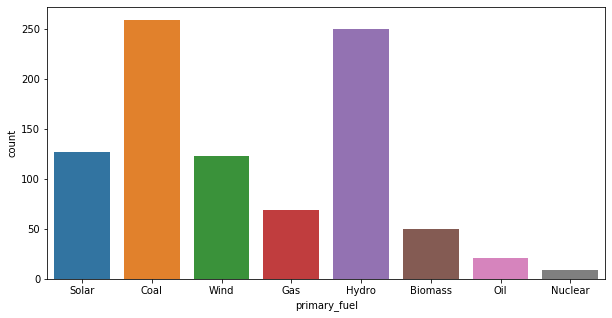

In [21]:
# Plotting the Primary fuel column:
plt.figure(figsize=(10,5))
sns.countplot('primary_fuel',data=df)
plt.show()

There are eight types of primary fuel used by the Power Plants.Most(259 power plants) of the power plants use Coal as their fuel.Nuclear as a fuel is used rarely by the power plants in India.It is only used in 9 power plants.

In [22]:
# Counting Fuel 1 column:
df['other_fuel1'].value_counts()

Oil             905
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

There are three types of fuels in other_fuel1 column .Oil is used in 196 Power Plants and Cogeneration is used only in one Power Plant.


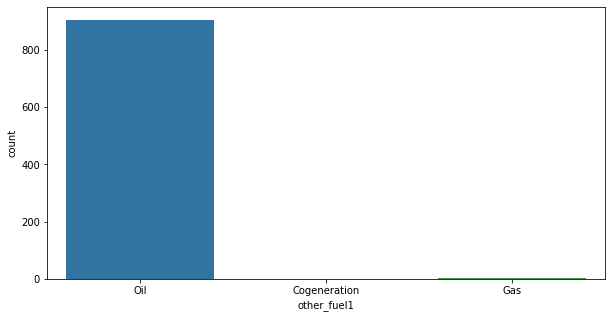

In [23]:
# Plotting the other_fuel1 column:
plt.figure(figsize=(10,5))
sns.countplot('other_fuel1',data=df)
plt.show()

There are three types of fuels in other_fuel1 column .Oil is used in 196 Power Plants and Cogeneration is used only in one Power Plant.


In [24]:
# Counting fuel 2 columnn:
df['other_fuel2'].value_counts()

Oil    908
Name: other_fuel2, dtype: int64

There is only one type of fuel in other_fuel2 which is oil.


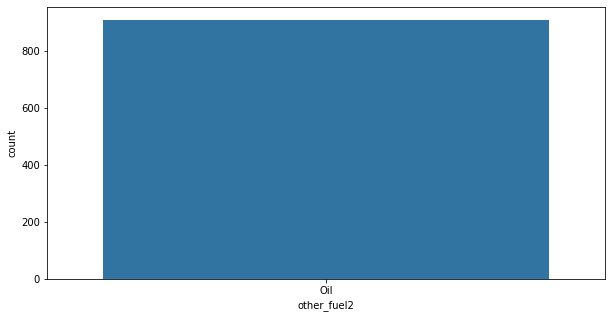

In [25]:
# Plotting the other_fuel2 column:
plt.figure(figsize=(10,5))
sns.countplot('other_fuel2',data=df)
plt.show()

There is only one type of fuel in other_fuel2 which is oil.


In [26]:
# Counting the owner column:
df['owner'].value_counts()

Acc Acc ltd                            570
Sterling Agro Industries ltd.            4
Jk Cement ltd                            4
Hindustan Zinc ltd                       3
Karnataka Power Corporation Limited      3
                                      ... 
Janki Corp ltd                           1
Shri Vedganga ssk                        1
Solar Paces                              1
Nav Bharat Buildcon Private Limited      1
Kesoram Industries ltd                   1
Name: owner, Length: 280, dtype: int64

There are 280 different owners of the Powerplants.


In [27]:
# Counting the source column:
df['source'].value_counts()

Central Electricity Authority                520
CDM                                          124
Lancosola                                     10
National Renewable Energy Laboratory           8
National Thermal Power Corporation (NTPC)      6
                                            ... 
Maral Overseas ltd                             1
Amrit Energy Private Limited                   1
Sterling and Wilson                            1
Punj Lloyd                                     1
Vasantdada Ssk ltd                             1
Name: source, Length: 191, dtype: int64

There are 191 different sources of the Powerplants.


In [28]:
# Counting the geolocation_source column:
df['geolocation_source'].value_counts()

WRI                                     785
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

There are three geo location source.The highest is WRI(766) and the lowest is National Renewable Energy Laboratory(4).


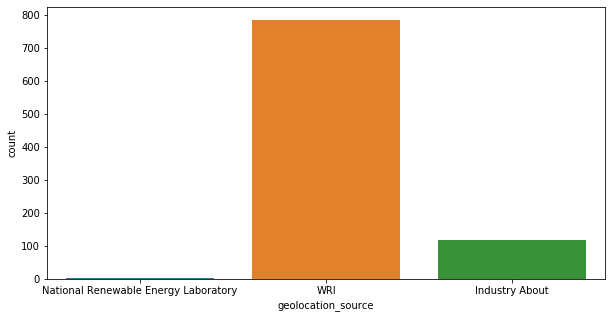

In [29]:
# Plotting the Geo location source:
plt.figure(figsize=(10,5))
sns.countplot('geolocation_source',data=df)
plt.show()

There are three geo location source.The highest is WRI(766) and the lowest is National Renewable Energy Laboratory(4).


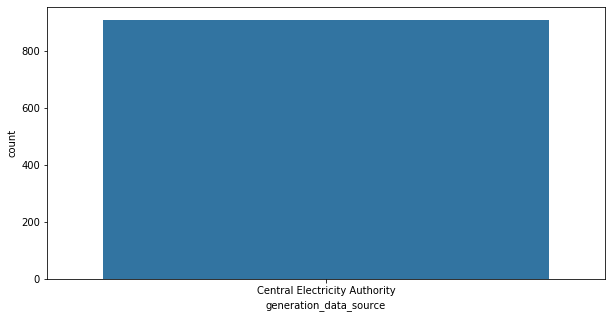

In [30]:
# Plotting  Generation Data Sorce:
plt.figure(figsize=(10,5))
sns.countplot('generation_data_source',data=df)
plt.show()

There is only one generation_data_source.


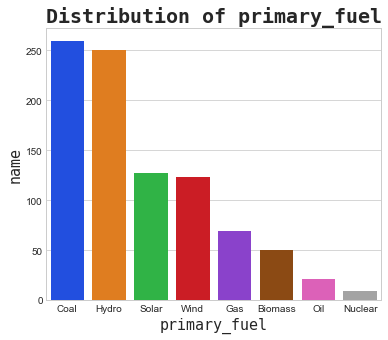

In [31]:
# Creating a barplot for 'Primary fuel'
income = df['primary_fuel'].value_counts()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(6, 5))
sns.barplot(income.index, income.values, palette='bright')
plt.title('Distribution of primary_fuel', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('primary_fuel', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('name', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

There are eight types of primary fuel used by the Power Plants.Most(259 power plants) of the power plants use Coal as their fuel.Nuclear as a fuel is used rarely by the power plants in India.It is only used in 9 power plants.

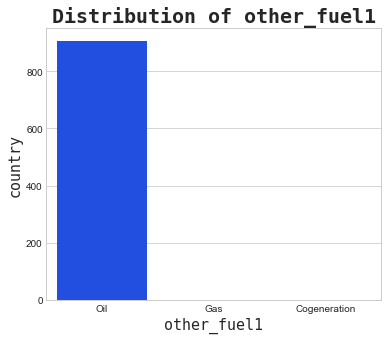

In [32]:
# Creating a barplot for 'other_fuel1'
income = df['other_fuel1'].value_counts()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(6, 5))
sns.barplot(income.index, income.values, palette='bright')
plt.title('Distribution of other_fuel1', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('other_fuel1', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('country', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

There are three types of fuels in other_fuel1 column .Oil is used in 196 Power Plants and Cogeneration is used only in one Power Plant.


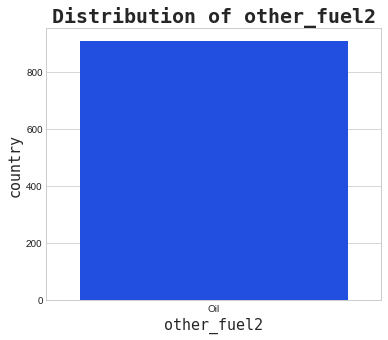

In [33]:
# Creating a barplot for 'Other fuel2'
income = df['other_fuel2'].value_counts()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(6, 5))
sns.barplot(income.index, income.values, palette='bright')
plt.title('Distribution of other_fuel2', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('other_fuel2', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('country', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

There is only oil in Other ful 2 column.


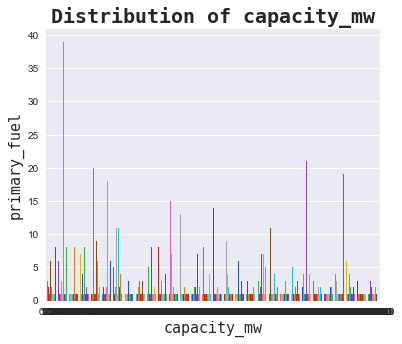

In [34]:
# Plotting capacity_mw vs primary fuel:
income = df['capacity_mw'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize=(6, 5))
sns.barplot(income.index, income.values, palette='bright')
plt.title('Distribution of capacity_mw', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('capacity_mw', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('primary_fuel', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

Minimum 0.0
Maximum 4760.0


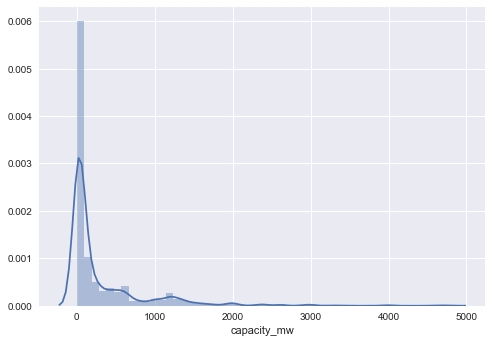

In [35]:
# Plotting capacity_mw:
sns.distplot(df['capacity_mw'])
print('Minimum',df['capacity_mw'].min())
print('Maximum',df['capacity_mw'].max())

The label is right skewed as the minimum value is 0 and maximum value is 4760. The gap is huge.


Minimum 68.6447
Maximum 95.408


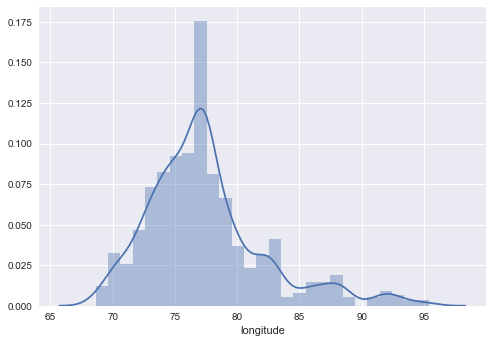

In [36]:
# plotting the longitude column:
sns.distplot(df['longitude'])
print('Minimum',df['longitude'].min())
print('Maximum',df['longitude'].max())

Longitude column is showing normal distribution.


Minimum 8.1689
Maximum 34.649


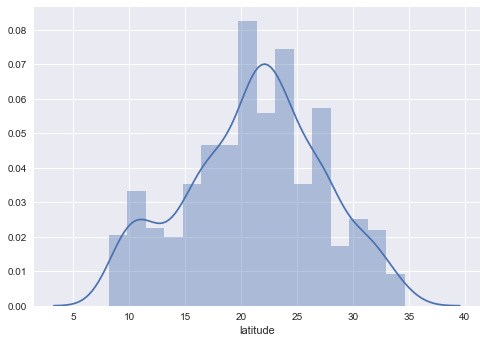

In [37]:
# Plotting Latitude column:
sns.distplot(df['latitude'])
print('Minimum',df['latitude'].min())
print('Maximum',df['latitude'].max())

Latitude column is also showing normal distribution.


In [39]:
# Lets drop unnessesory columns:
drop_columns=['country','name','gppd_idnr','country_long','other_fuel1','other_fuel2','other_fuel3','url','wepp_id','estimated_generation_gwh',
              'year_of_capacity_data']
df=df.drop(columns=drop_columns,axis=1)

capacity_mw                AxesSubplot(0.125,0.71587;0.168478x0.16413)
latitude                AxesSubplot(0.327174,0.71587;0.168478x0.16413)
longitude               AxesSubplot(0.529348,0.71587;0.168478x0.16413)
commissioning_year      AxesSubplot(0.731522,0.71587;0.168478x0.16413)
generation_gwh_2013       AxesSubplot(0.125,0.518913;0.168478x0.16413)
generation_gwh_2014    AxesSubplot(0.327174,0.518913;0.168478x0.16413)
generation_gwh_2015    AxesSubplot(0.529348,0.518913;0.168478x0.16413)
generation_gwh_2016    AxesSubplot(0.731522,0.518913;0.168478x0.16413)
generation_gwh_2017       AxesSubplot(0.125,0.321957;0.168478x0.16413)
dtype: object

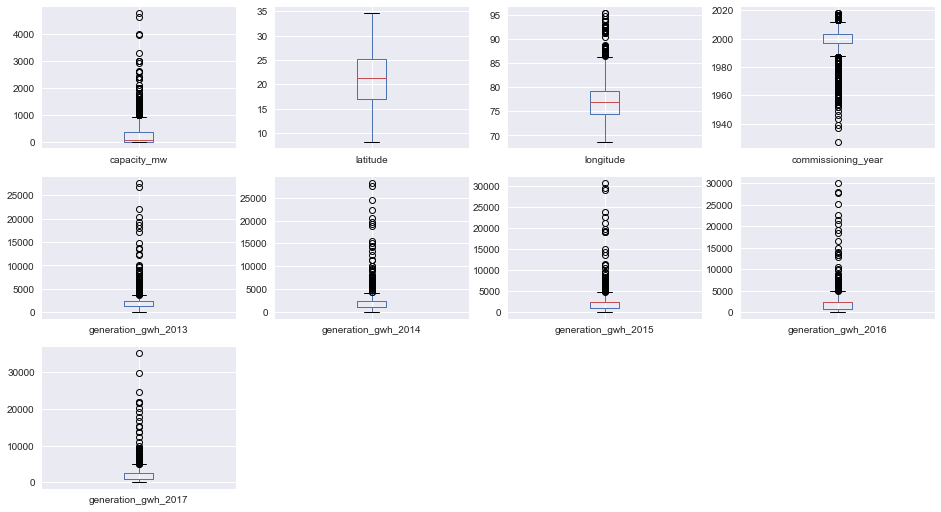

In [40]:
# Checking the outliers by using box plot:
df.plot(kind='box',subplots=True,layout=(4,4),figsize=(16,12))

Except latitude column all the continuous columns are having outliers.


In [41]:
df['primary_fuel']= df['primary_fuel'].replace({'Hydro':1,'Coal':2,'Solar':3,'Wind':4,'Gas':5,'Biomass':6,'Oil':7,'Nuclear':8})

In [42]:
df['primary_fuel'].value_counts()

2    259
1    250
3    127
4    123
5     69
6     50
7     21
8      9
Name: primary_fuel, dtype: int64

encoded the categories of the target variable 'primary_fuel'.

# Dividing the target variable and the features:

In [43]:
y = df['primary_fuel']
x = df.drop(columns=['primary_fuel'])
x

,capacity_mw,latitude,longitude,commissioning_year,owner,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,2.5,28.1839,73.2407,2011.000000,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
1,98.0,24.7663,74.6090,1996.876894,Ultratech Cement ltd,Ultratech Cement ltd,WRI,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
2,39.2,21.9038,69.3732,1996.876894,AES,CDM,WRI,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
3,135.0,23.8712,91.3602,2004.000000,Acc Acc ltd,Central Electricity Authority,WRI,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority
4,1800.0,21.9603,82.4091,2015.000000,Acc Acc ltd,Central Electricity Authority,WRI,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,2016.000000,Acc Acc ltd,Central Electricity Authority,WRI,2304.059202,2420.393316,0.994875,233.596650,865.400000,Central Electricity Authority
904,3.0,12.8932,78.1654,1996.876894,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,Industry About,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
905,25.5,15.2758,75.5811,1996.876894,Acc Acc ltd,CDM,WRI,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
906,80.0,24.3500,73.7477,1996.876894,Hindustan Zinc ltd,Hindustan Zinc ltd,WRI,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority


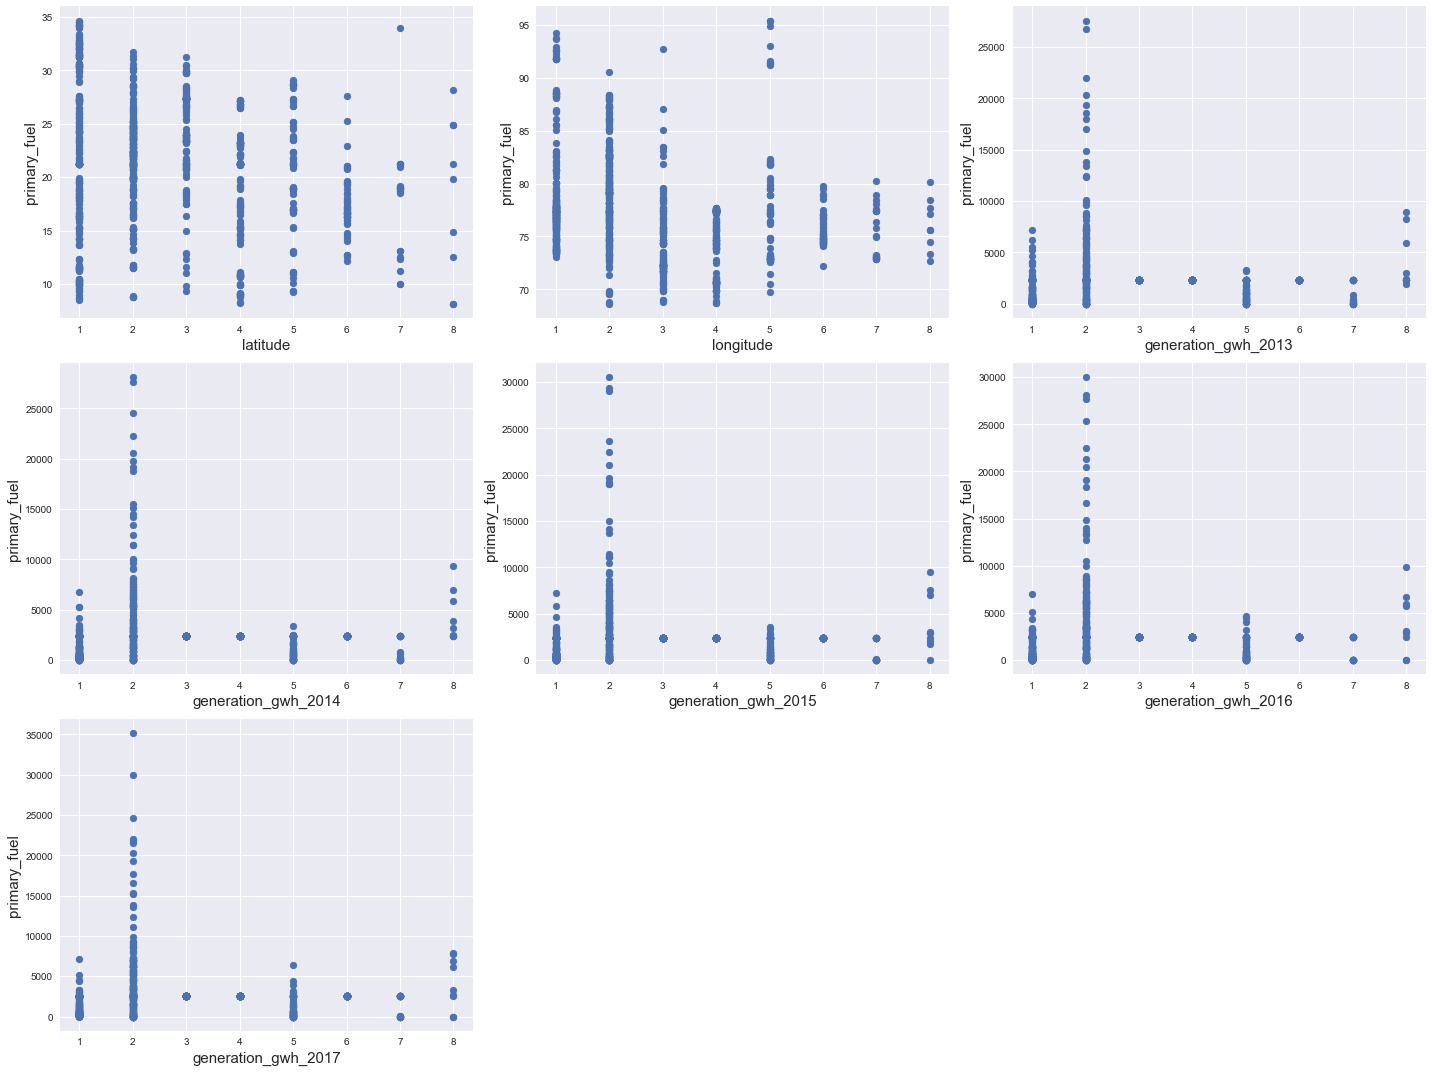

In [44]:
# Separating the continuous feature and checking relation with Primary fuel:
df_con_features=df[['latitude','longitude',
                    'generation_gwh_2013','generation_gwh_2014',
                    'generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']]
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in df_con_features:
    if plotnumber<=8:
        ax=plt.subplot(3,3,plotnumber)
        plt.scatter(y,df_con_features[column])
        plt.xlabel(column,fontsize=15)
        plt.ylabel('primary_fuel',fontsize=15)
    plotnumber+=1
plt.tight_layout()

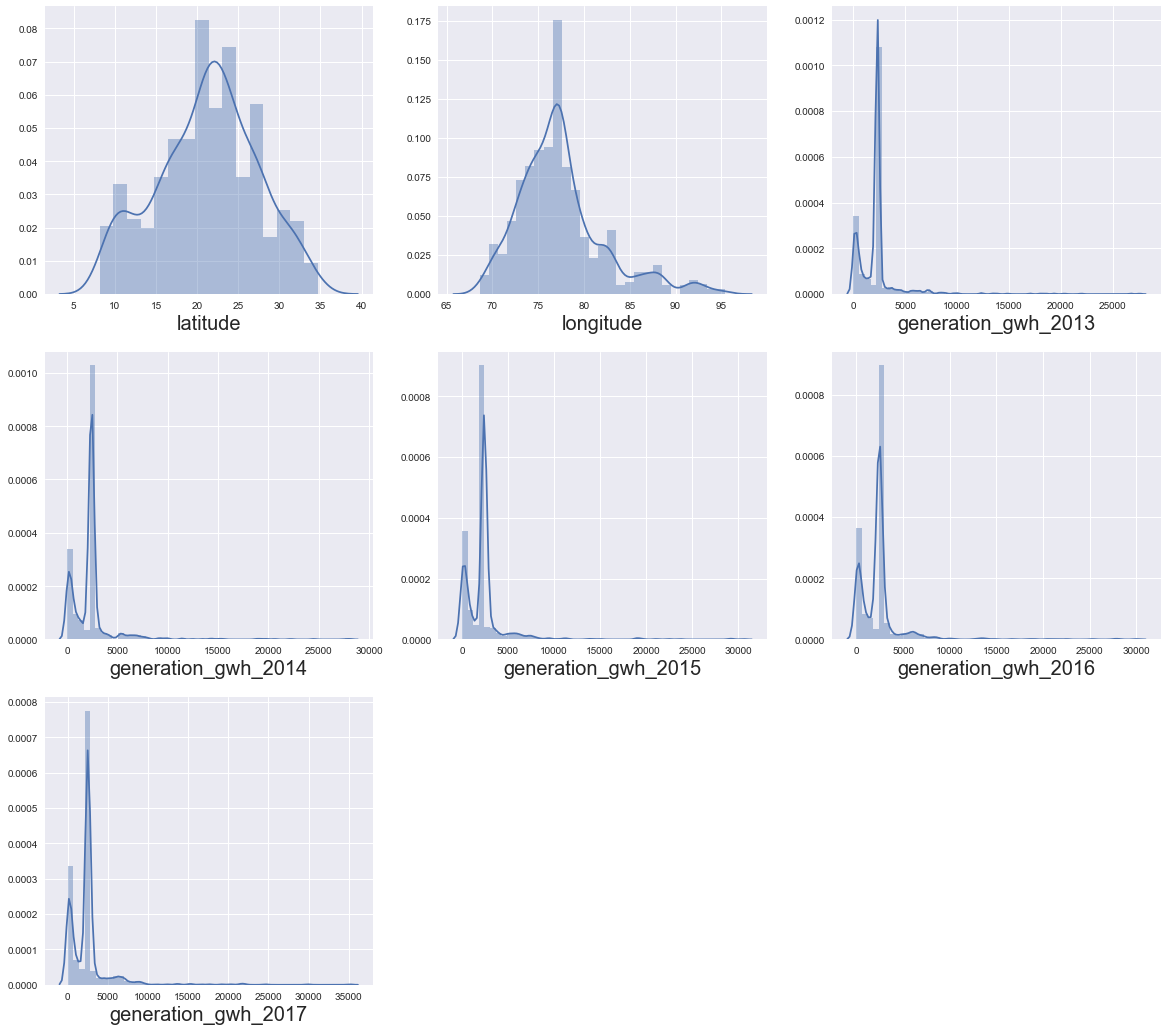

In [45]:
# Checking the normal distribution:
plt.figure(figsize=(20,18),facecolor='white')
plotnumber=1
for column in df_con_features:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df_con_features[column],kde=True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

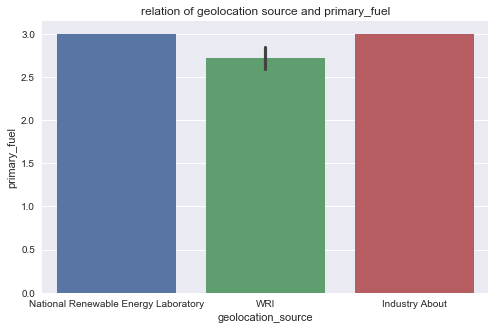

In [46]:
#Plotting geolocation source and primary fuel:
plt.figure(figsize=(8,5))
sns.barplot(x='geolocation_source',y='primary_fuel',data=df).set_title('relation of geolocation source and primary_fuel')
plt.show()

Both National Renewable Energy Laboratory and IN=ndustry consume approx same amount of Primary fuel.


In [47]:
# Separating another target variable capacity_mw with the features:
Y = df['capacity_mw']
X = df.drop(columns=['capacity_mw'])
X

,latitude,longitude,primary_fuel,commissioning_year,owner,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,28.1839,73.2407,3,2011.000000,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
1,24.7663,74.6090,2,1996.876894,Ultratech Cement ltd,Ultratech Cement ltd,WRI,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
2,21.9038,69.3732,4,1996.876894,AES,CDM,WRI,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
3,23.8712,91.3602,5,2004.000000,Acc Acc ltd,Central Electricity Authority,WRI,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority
4,21.9603,82.4091,2,2015.000000,Acc Acc ltd,Central Electricity Authority,WRI,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,16.2949,77.3568,2,2016.000000,Acc Acc ltd,Central Electricity Authority,WRI,2304.059202,2420.393316,0.994875,233.596650,865.400000,Central Electricity Authority
904,12.8932,78.1654,3,1996.876894,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,Industry About,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
905,15.2758,75.5811,4,1996.876894,Acc Acc ltd,CDM,WRI,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
906,24.3500,73.7477,2,1996.876894,Hindustan Zinc ltd,Hindustan Zinc ltd,WRI,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority


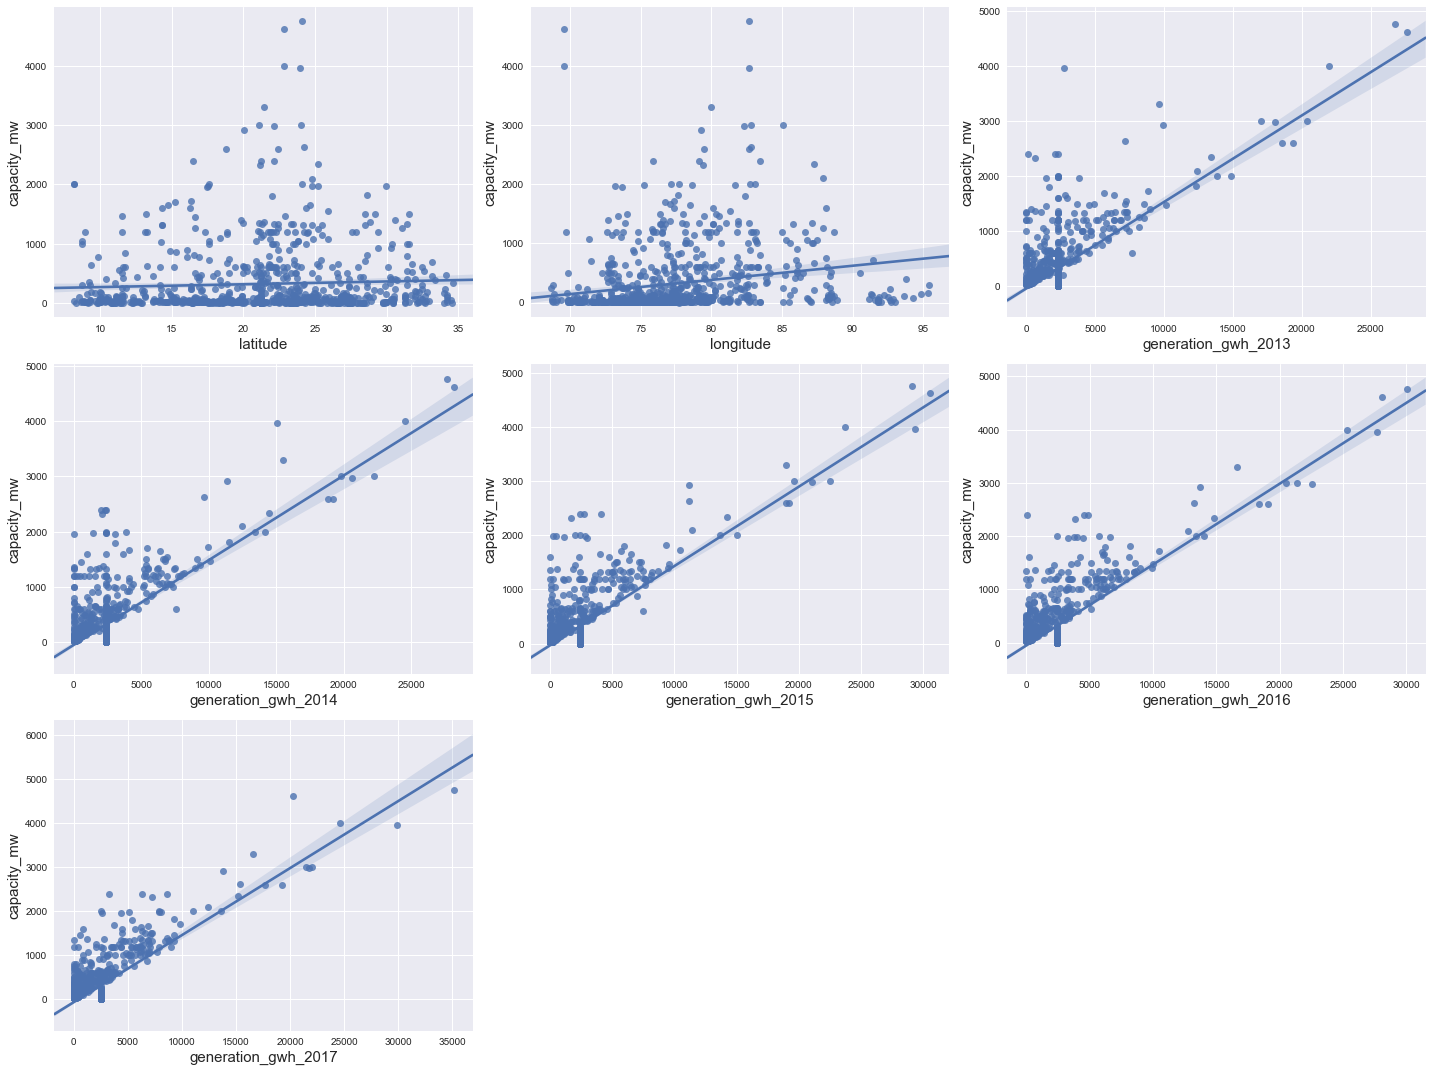

In [48]:
# Checking relation between the capacity_mw and the continuous features:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in df_con_features:
    if plotnumber<=8:
        ax=plt.subplot(3,3,plotnumber)
        sns.regplot(df_con_features[column],Y)
        plt.xlabel(column,fontsize=15)
        plt.ylabel('capacity_mw',fontsize=15)
    plotnumber+=1
plt.tight_layout()

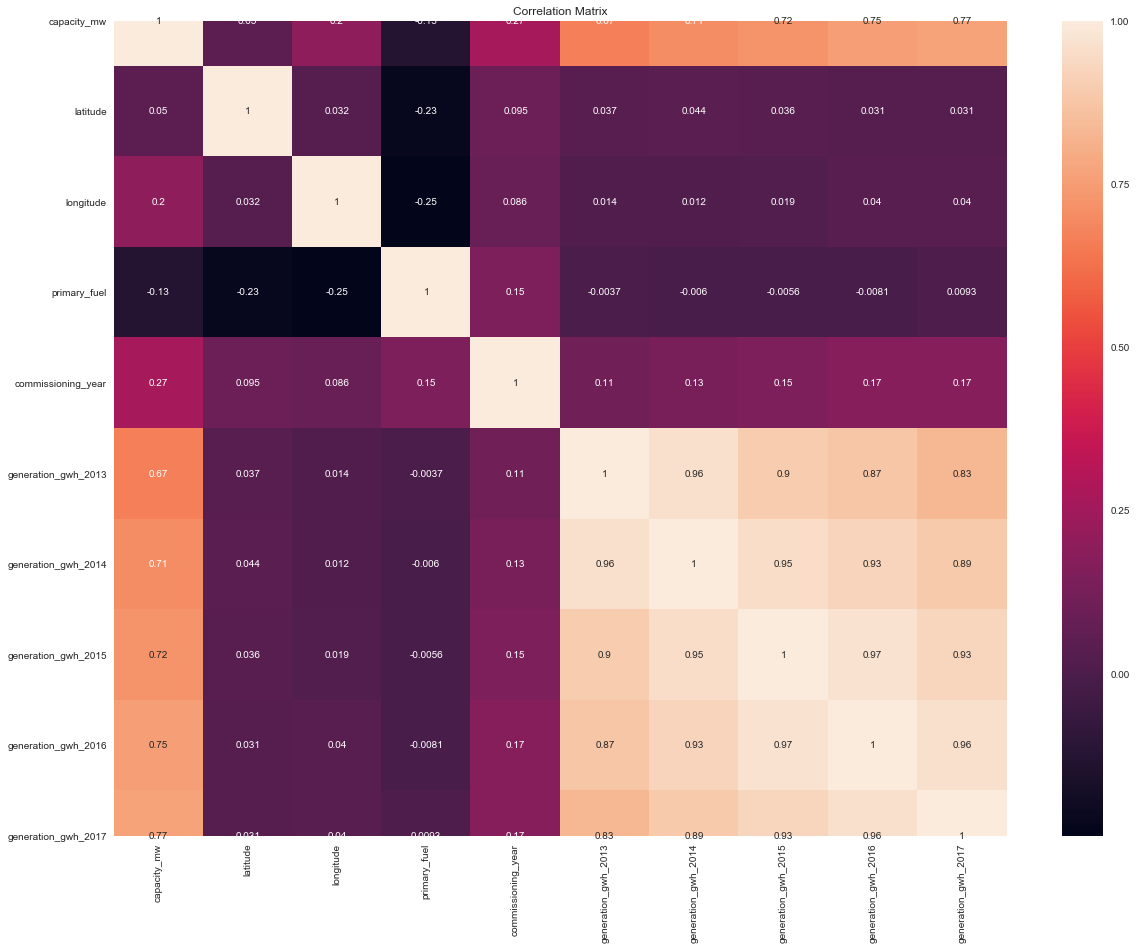

In [49]:
# CHECKING MULTI-COLINEARITY OF THE COLUMNS:
corr_mat = df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_mat, annot=True)
plt.title('Correlation Matrix')
plt.show()

gwh-2013 generation_gwh-2014,generation_gwh-2015,generation_gwh-2016 and generation_gwh-2017 is co-related with capacity_mw.


In [50]:
# Encoding all the categoricalcolumns:
en=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=en.fit_transform(df[i].values.reshape(-1,1))
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,2.5,28.1839,73.2407,3,2011.000000,229.0,109.0,1.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0.0
1,98.0,24.7663,74.6090,2,1996.876894,258.0,174.0,2.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0.0
2,39.2,21.9038,69.3732,4,1996.876894,2.0,21.0,2.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0.0
3,135.0,23.8712,91.3602,5,2004.000000,5.0,22.0,2.0,631.777928,617.789264,843.747000,886.004428,663.774500,0.0
4,1800.0,21.9603,82.4091,2,2015.000000,5.0,22.0,2.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,0.0


Encoded all the categorical columns.


In [51]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,2.5,28.1839,73.2407,3,2011.000000,229.0,109.0,1.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0.0
1,98.0,24.7663,74.6090,2,1996.876894,258.0,174.0,2.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0.0
2,39.2,21.9038,69.3732,4,1996.876894,2.0,21.0,2.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0.0
3,135.0,23.8712,91.3602,5,2004.000000,5.0,22.0,2.0,631.777928,617.789264,843.747000,886.004428,663.774500,0.0
4,1800.0,21.9603,82.4091,2,2015.000000,5.0,22.0,2.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,0.0


In [52]:
#checking the skewness

df.skew()

capacity_mw               3.193257
latitude                 -0.147391
longitude                 1.129836
primary_fuel              0.933977
commissioning_year       -1.383330
owner                     1.366078
source                    1.829145
geolocation_source       -2.161710
generation_gwh_2013       5.241491
generation_gwh_2014       5.041961
generation_gwh_2015       5.367370
generation_gwh_2016       5.071758
generation_gwh_2017       5.111938
generation_data_source    0.000000
dtype: float64

-Most of the data is having skewness.we will remove the skewness by using power transform.



In [53]:
df=df.drop(columns='generation_data_source',axis=1)

Dropping the generation_data_source because it contains only one type of value.


In [54]:
# REMOVING SKEWNESS BY USING POWER TRANSFORMER:
f=['longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']


In [55]:
scaler=PowerTransformer(method='yeo-johnson')

In [56]:
df[f]=scaler.fit_transform(df[f].values)

In [57]:
df[f]

,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,-0.953208,0.275916,0.288574,0.314141,0.318130,0.315890
1,-0.545103,0.275916,0.288574,0.314141,0.318130,0.315890
2,-2.380298,0.275916,0.288574,0.314141,0.318130,0.315890
3,2.188101,-0.871520,-0.858979,-0.569352,-0.532799,-0.738449
4,1.122921,-0.066258,0.544049,1.389487,1.431262,1.185388
...,...,...,...,...,...,...
903,0.155127,0.275916,0.288574,-2.244308,-1.259989,-0.568859
904,0.335003,0.275916,0.288574,0.314141,0.318130,0.315890
905,-0.280434,0.275916,0.288574,0.314141,0.318130,0.315890
906,-0.796868,0.275916,0.288574,0.314141,0.318130,0.315890


In [58]:
df.skew()

capacity_mw            3.193257
latitude              -0.147391
longitude              0.002419
primary_fuel           0.933977
commissioning_year    -1.383330
owner                  1.366078
source                 1.829145
geolocation_source    -2.161710
generation_gwh_2013    0.180340
generation_gwh_2014    0.124543
generation_gwh_2015    0.070937
generation_gwh_2016    0.038668
generation_gwh_2017    0.013392
dtype: float64

There is still skewness in the columns.

In [59]:
bins=(0, 4, 8)
group_names=['fuel1', 'fuel2']
df['primary_fuel']=pd.cut(df['primary_fuel'], bins=bins, labels =group_names)

As primary fuel has multi-class,we made two classes fuel 1 and fuel 2 to create a binary class.


In [60]:
df['primary_fuel'].value_counts()

fuel1    759
fuel2    149
Name: primary_fuel, dtype: int64

Created two class fuel 1 and fuel 2 fro Multiclass primary fuel.we have only two classes now.fuel1 is having higher values than fuel2 and the differnce betwee them is high,so we will balaance the class figures by using SMOTE function.

In [61]:
# Encoding the primary fuel column by using Label encoder:
l = LabelEncoder()
l_s = ['primary_fuel']
for i in l_s:
    df[i] = l.fit_transform(df[i])

In [62]:
df['primary_fuel'].value_counts()

0    759
1    149
Name: primary_fuel, dtype: int64

Primary fuel column is encoded.fuel 1 as 0 and fuel 2 as 1.

In [63]:
# Separating the target variable and the features:
y=df['primary_fuel']
x=df.drop(columns=['primary_fuel'])

In [64]:
# USING SMOTE FUNCTION FOR BALANCING:
sm=SMOTE()
x,y = sm.fit_resample(x,y)

# Standardization:

In [65]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [66]:
#Hold Out Method

x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=100)

# Building Model for Predicting the Primary Fuel Tyype

# 1. Logistics Regression

In [67]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_train)
lr_clf_report = pd.DataFrame(classification_report(y_train,lr_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_train,lr_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{lr_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,lr_pred)}\n")

Accuracy score:75.40%
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.746167    0.762250  0.753954     0.754209      0.754209
recall       0.769772    0.738137  0.753954     0.753954      0.753954
f1-score     0.757785    0.750000  0.753954     0.753893      0.753893
support    569.000000  569.000000  0.753954  1138.000000   1138.000000
 Confusion Matrix:
[[438 131]
 [149 420]]



In [68]:
lr_pred=lr.predict(x_test)
lr_clf_report = pd.DataFrame(classification_report(y_test,lr_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_test,lr_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{lr_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,lr_pred)}\n")

Accuracy score:75.00%
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.746114    0.754011      0.75    0.750062      0.750062
recall       0.757895    0.742105      0.75    0.750000      0.750000
f1-score     0.751958    0.748011      0.75    0.749984      0.749984
support    190.000000  190.000000      0.75  380.000000    380.000000
 Confusion Matrix:
[[144  46]
 [ 49 141]]



In [69]:
roc_auc_score(y_test,lr.predict(x_test))

0.75

# 2.Decision Tree Classifier

In [70]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_train)
dt_clf_report = pd.DataFrame(classification_report(y_train,dt_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_train,dt_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{dt_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,dt_pred)}\n")

Accuracy score:100.00%
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    569.0  569.0       1.0     1138.0        1138.0
 Confusion Matrix:
[[569   0]
 [  0 569]]



In [71]:
dt_pred=dt.predict(x_test)
dt_clf_report = pd.DataFrame(classification_report(y_test,dt_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_test,dt_pred)*100:.2f}%")

print(f"CLASSIFICATION REPORT:\n{dt_clf_report}")

print(f" Confusion Matrix:\n{confusion_matrix(y_test,dt_pred)}\n")

Accuracy score:87.63%
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.895028    0.859296  0.876316    0.877162      0.877162
recall       0.852632    0.900000  0.876316    0.876316      0.876316
f1-score     0.873315    0.879177  0.876316    0.876246      0.876246
support    190.000000  190.000000  0.876316  380.000000    380.000000
 Confusion Matrix:
[[162  28]
 [ 19 171]]



In [72]:
roc_auc_score(y_test,dt.predict(x_test))

0.8763157894736842

# 3. Random Forest Classifier

In [73]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_train)
rf_clf_report = pd.DataFrame(classification_report(y_train,rf_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_train,rf_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{rf_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,rf_pred)}\n")

Accuracy score:100.00%
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    569.0  569.0       1.0     1138.0        1138.0
 Confusion Matrix:
[[569   0]
 [  0 569]]



In [74]:
rf_pred=rf.predict(x_test)
rf_clf_report = pd.DataFrame(classification_report(y_test,rf_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_test,rf_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{rf_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,rf_pred)}\n")

Accuracy score:91.58%
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.934066    0.898990  0.915789    0.916528      0.916528
recall       0.894737    0.936842  0.915789    0.915789      0.915789
f1-score     0.913978    0.917526  0.915789    0.915752      0.915752
support    190.000000  190.000000  0.915789  380.000000    380.000000
 Confusion Matrix:
[[170  20]
 [ 12 178]]



In [75]:
roc_auc_score(y_test,rf.predict(x_test))

0.9157894736842105

# 4.KNeighbors Classifier

In [76]:
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
kn_pred = kn.predict(x_train)
kn_clf_report = pd.DataFrame(classification_report(y_train,kn_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_train,kn_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{kn_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,kn_pred)}\n")

Accuracy score:92.36%
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.958175    0.893791   0.92355     0.925983      0.925983
recall       0.885764    0.961336   0.92355     0.923550      0.923550
f1-score     0.920548    0.926334   0.92355     0.923441      0.923441
support    569.000000  569.000000   0.92355  1138.000000   1138.000000
 Confusion Matrix:
[[504  65]
 [ 22 547]]



In [77]:
kn_pred=kn.predict(x_test)
kn_clf_report = pd.DataFrame(classification_report(y_test,kn_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_test,kn_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{kn_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,kn_pred)}\n")

Accuracy score:88.16%
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.950311    0.831050  0.881579    0.890680      0.890680
recall       0.805263    0.957895  0.881579    0.881579      0.881579
f1-score     0.871795    0.889976  0.881579    0.880885      0.880885
support    190.000000  190.000000  0.881579  380.000000    380.000000
 Confusion Matrix:
[[153  37]
 [  8 182]]



In [78]:
roc_auc_score(y_test,kn.predict(x_test))

0.8815789473684211

# 5.Support Vector Classifier

In [79]:
svc = SVC()
svc.fit(x_train,y_train)
svc_pred = svc.predict(x_train)
svc_clf_report = pd.DataFrame(classification_report(y_train,svc_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_train,svc_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{lr_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,svc_pred)}\n")

Accuracy score:85.33%
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.746114    0.754011      0.75    0.750062      0.750062
recall       0.757895    0.742105      0.75    0.750000      0.750000
f1-score     0.751958    0.748011      0.75    0.749984      0.749984
support    190.000000  190.000000      0.75  380.000000    380.000000
 Confusion Matrix:
[[480  89]
 [ 78 491]]



In [80]:
svc_pred=svc.predict(x_test)
svc_report = pd.DataFrame(classification_report(y_test,svc_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_test,svc_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{svc_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,svc_pred)}\n")

Accuracy score:84.74%
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.862637    0.833333  0.847368    0.847985      0.847985
recall       0.826316    0.868421  0.847368    0.847368      0.847368
f1-score     0.844086    0.850515  0.847368    0.847301      0.847301
support    190.000000  190.000000  0.847368  380.000000    380.000000
 Confusion Matrix:
[[157  33]
 [ 25 165]]



In [81]:
roc_auc_score(y_test,svc.predict(x_test))

0.8473684210526315

# Cross Validation Score

In [82]:
print(f" CV Score of LR:{cross_val_score(lr,x,y,cv=5).mean()*100:.2f}%")

 CV Score of LR:72.46%


In [83]:
print(f"CV Score of DT:{cross_val_score(dt,x,y,cv=5).mean()*100:.2f}%")

CV Score of DT:87.22%


In [84]:
print(f"CV Score of RF:{cross_val_score(rf,x,y,cv=5).mean()*100:.2f}%")

CV Score of RF:92.75%


In [85]:
print(f"CV Score of KNN:{cross_val_score(kn,x,y,cv=5).mean()*100:.2f}%")

CV Score of KNN:83.40%


In [86]:
print(f"CV Score of SVC:{cross_val_score(svc,x,y,cv=5).mean()*100:.2f}%")

CV Score of SVC:51.98%


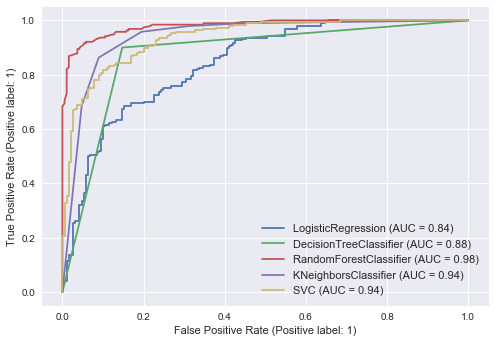

In [87]:
# Let's check ROC_AUC curve for fitted models:

disp =plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

Choosing random forest model as the best model for the classificaton problem for predicting the primary fuel type because the differnce between the Accuracy score and cross validation score is least.

# Hyper Parameter Tuning of thr Random Forest Classifier:

In [88]:
grid_param={
   'n_estimators':[13,15,15,17,19,21],
       'criterion':['entropy','gini'],
       'max_depth':[10,15,20,25,30,35],
       'min_samples_split':[10,11,12,13,14,15],
       'min_samples_leaf':[5,6,7,8,9,10]}

In [89]:
grid_search=GridSearchCV(estimator=rf,param_grid=grid_param,cv=5,n_jobs=-1)

In [90]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 15, 20, 25, 30, 35],
                         'min_samples_leaf': [5, 6, 7, 8, 9, 10],
                         'min_samples_split': [10, 11, 12, 13, 14, 15],
                         'n_estimators': [13, 15, 15, 17, 19, 21]})

In [91]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 35, 'min_samples_leaf': 6, 'min_samples_split': 12, 'n_estimators': 17}


In [92]:
rf = RandomForestClassifier(criterion= 'entropy',max_depth=35,min_samples_leaf = 5, min_samples_split=13,n_estimators =21)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.8894736842105263

after doing hyperparameter tuning we got the score of 89%.approx.


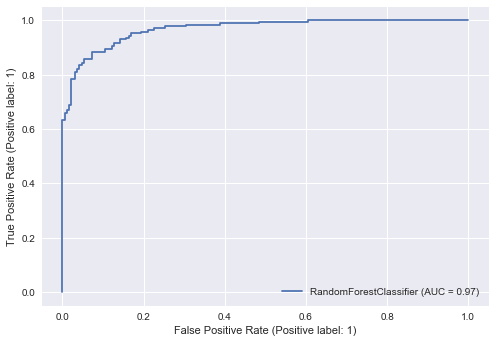

In [93]:
disp = plot_roc_curve(rf,x_test,y_test)

In [94]:
# model prediction using DT
x_predict = list(dt.predict(x_test))
rf_clglobal = {'predicted_values':x_predict,'orignal_values':y_test}
print(pd.DataFrame(rf_clglobal))

      predicted_values  orignal_values
1494                 1               1
341                  0               0
733                  0               0
299                  0               0
1068                 1               1
...                ...             ...
508                  0               0
1356                 0               1
1002                 1               1
896                  0               0
1034                 1               1

[380 rows x 2 columns]


In [95]:
#import joblib
import joblib

joblib.dump(dt,'rf_clglobal.obj')

# SAVING THE MODEL

['rf_clglobal.obj']

In [96]:
rf_clglobal=joblib.load('rf_clglobal.obj')
rf_clglobal.predict(x_test)

#TESTING THE SAVED MODEL

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,

# Now we will create regression models to predict the capacity_mw.

In [97]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,-0.953208,0,2011.000000,229.0,109.0,1.0,0.275916,0.288574,0.314141,0.318130,0.315890
1,98.0,24.7663,-0.545103,0,1996.876894,258.0,174.0,2.0,0.275916,0.288574,0.314141,0.318130,0.315890
2,39.2,21.9038,-2.380298,0,1996.876894,2.0,21.0,2.0,0.275916,0.288574,0.314141,0.318130,0.315890
3,135.0,23.8712,2.188101,1,2004.000000,5.0,22.0,2.0,-0.871520,-0.858979,-0.569352,-0.532799,-0.738449
4,1800.0,21.9603,1.122921,0,2015.000000,5.0,22.0,2.0,-0.066258,0.544049,1.389487,1.431262,1.185388


# Separating the target variable and the Features:

In [98]:
#Preparing data for training model
X = df.drop(['capacity_mw'], axis=1)
y = np.log1p(df['capacity_mw'])

In [99]:
dummy = pd.get_dummies(df['primary_fuel'])
dummy # Creating dummy variable for the primary fuel

,0,1
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0
...,...,...
903,1,0
904,1,0
905,1,0
906,1,0


In [100]:
df = pd.concat([df,dummy],axis=1) # Merging the two data frames

In [101]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,0,1
0,2.5,28.1839,-0.953208,0,2011.000000,229.0,109.0,1.0,0.275916,0.288574,0.314141,0.318130,0.315890,1,0
1,98.0,24.7663,-0.545103,0,1996.876894,258.0,174.0,2.0,0.275916,0.288574,0.314141,0.318130,0.315890,1,0
2,39.2,21.9038,-2.380298,0,1996.876894,2.0,21.0,2.0,0.275916,0.288574,0.314141,0.318130,0.315890,1,0
3,135.0,23.8712,2.188101,1,2004.000000,5.0,22.0,2.0,-0.871520,-0.858979,-0.569352,-0.532799,-0.738449,0,1
4,1800.0,21.9603,1.122921,0,2015.000000,5.0,22.0,2.0,-0.066258,0.544049,1.389487,1.431262,1.185388,1,0


In [102]:
df.columns

Index([        'capacity_mw',            'latitude',           'longitude',
              'primary_fuel',  'commissioning_year',               'owner',
                    'source',  'geolocation_source', 'generation_gwh_2013',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017',                     0,                     1],
      dtype='object')

In [103]:
df = df.dropna(axis=0) # Removing rows which contain NaN values

# Selection of best model

In [104]:
from sklearn.model_selection import KFold
import sklearn.metrics as sm
from sklearn import preprocessing
from sklearn import utils
from sklearn import datasets

In [106]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y=df.capacity_mw 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print("X Train Shape ",X_train.shape)
print("Y Train Shape ",y_train.shape)

print("X Test Shape ",X_test.shape)
print("Y Test Shape ",y_test.shape)

X Train Shape  (726, 12)
Y Train Shape  (726,)
X Test Shape  (182, 12)
Y Test Shape  (182,)


# Decision tree regression

In [107]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=5)
dtr.fit(X_train, y_train)
y_pred_dt = dtr.predict(X_test)
dtr.score(X_test, y_test)

0.786029868345492

In [108]:
scr = cross_val_score(dtr, X,y, cv=4)
print(scr.mean())

0.7256261932610854


In [109]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_dt), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_dt), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_dt), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_dt), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_dt), 2))

Mean absolute error = 157.69
Mean squared error = 86311.31
Median absolute error = 46.35
Explain variance score = 0.79
R2 score = 0.79


# Random forest regression

In [110]:
rfr = RandomForestRegressor(random_state=1)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)
rfr.score(X_test, y_test)

0.908750942744414

In [111]:
scr = cross_val_score(rfr, X,y, cv=4)
print(scr.mean())

0.8362003357566242


In [112]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_rfr), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_rfr), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_rfr), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_rfr), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_rfr), 2))

Mean absolute error = 113.31
Mean squared error = 36808.06
Median absolute error = 46.08
Explain variance score = 0.91
R2 score = 0.91


# Support vector regression

In [113]:
from sklearn.svm import SVR
svr = SVR().fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
svr.score(X_test, y_test)

-0.21164584460714164

In [114]:
scr = cross_val_score(svr, X,y, cv=4)
print(scr.mean())

-0.21141834230515555


In [115]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_svr), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_svr), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_svr), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_svr), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_svr), 2))

Mean absolute error = 321.41
Mean squared error = 488753.91
Median absolute error = 48.75
Explain variance score = 0.0
R2 score = -0.21


# Lasso regression

In [116]:
from sklearn import linear_model
lassoReg = linear_model.Lasso(alpha=0.1).fit(X_train,y_train)
y_pred_lasso = lassoReg.predict(X_test)
lassoReg.score(X_test,y_test)

0.5639739258960866

In [117]:
scr = cross_val_score(lassoReg, X,y, cv=4)
print(scr.mean())

0.43083476138162535


In [118]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_lasso), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_lasso), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_lasso), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_lasso), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_lasso), 2))

Mean absolute error = 303.44
Mean squared error = 175884.27
Median absolute error = 230.7
Explain variance score = 0.56
R2 score = 0.56


# Linear regression

In [119]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True).fit(X, y)
y_pred_lr = lr.predict(X_test)
lr.score(X_test,y_test)

0.5725711605683685

In [120]:
cr = cross_val_score(lr, X,y, cv=4)
print(scr.mean())

0.43083476138162535


In [121]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_lr), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_lr), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_lr), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_lr), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_lr), 2))

Mean absolute error = 303.33
Mean squared error = 172416.32
Median absolute error = 231.07
Explain variance score = 0.57
R2 score = 0.57


# Best model: Random forest regression

In [122]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_rfr), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_rfr), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_rfr), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_rfr), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_rfr), 2))

Mean absolute error = 113.31
Mean squared error = 36808.06
Median absolute error = 46.08
Explain variance score = 0.91
R2 score = 0.91


PCA decreased model accuracy so I have decided to delete that part.



# Hyper paramter tuning

In [124]:
from sklearn.model_selection import GridSearchCV

In [125]:
parameters = { 'n_estimators' : [100,150],
               'min_samples_leaf' : [1,2], 
              'min_samples_split': [2,3],
              'criterion': ['mse','mae']
}

In [126]:
GCV = GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [127]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [100, 150]})

In [128]:
GCV.best_params_

{'criterion': 'mae',
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 150}

In [129]:
mod = RandomForestRegressor(min_samples_leaf= 1, min_samples_split =2, n_estimators = 150, criterion='mae')
mod.fit(X_train,y_train)
pred = mod.predict(X_test)
mod.score(X_test,y_test)

0.9104257687222792

After hyper tuning we achieved 91.04% accuracy



# Saving the model

In [130]:
import joblib
joblib.dump(mod,"PowerPlant.pkl")

['PowerPlant.pkl']

# CONCLUSION: